In [1]:
% setup environment
% set path to equilibrium solver
txt=pwd;
n=length(txt);
rootpath=txt; %txt(1:n-8);
PHREEQCpath=[rootpath,'/runPHREEQC'];
addpath(PHREEQCpath);
JEQUILIBpath=[rootpath,'/JEQUILIB']; addpath(JEQUILIBpath);
Cumodelspath=[rootpath,'/Cutableaus']; addpath(Cumodelspath);
% clear data and number format
clear; format short e
% turn off warnings
warning off
graphics_toolkit ("notebook"); 
graphics_toolkit ("plotly"); 

In [2]:
% put in constants
VT=0.05; %total volume
stockCuconc=0.0152067;

In [3]:
% put in data
data=[...
%time hr	time min	time total	cumulative  vol added	pH	mvA	delta
%1	17	77	0	2.009	78.1	13.6285714285714
%1	23	83	0	2.000	73.8	-0.716666666666666
%1	28	88	0	1.999	76	0.440000000000001
%1	33	93	0	1.999	77.8	0.359999999999999
%1	38	98	0	1.995	79.4	0.320000000000002
%1	43	103	0	1.996	81.8	0.479999999999998
%1	48	108	0	1.995	84	0.440000000000001
%1	53	113	0	2.005	86	0.4
%1	58	118	0	2.006	87.7	0.340000000000001
%2	3	123	0	2.008	89.8	0.419999999999999
%2	8	128	0	2.009	90.4	0.120000000000002
%2	13	133	0	2.006	91	0.119999999999999
%2	18	138	0	2.006	91.7	0.140000000000001
%2	23	143	0	2.005	92.3	0.119999999999999
%2	28	148	0	2.004	92.4	0.0200000000000017
%2	33	153	0	2.007	93.4	0.2
%2	38	158	0	2.003	93.9	0.1
%2	43	163	0	2.002	95	0.219999999999999
%2	48	168	0	2.001	95.4	0.0800000000000011
2	53	173	0	2.002	95.6	0.0399999999999977
2	58	178	0	2.001	95.6	0
%3	0	180	50	2.001	97.9	1.15000000000001
%3	5	185	50	2	102.8	0.979999999999998
%3	10	190	50	2	103.8	0.2
%3	22	202	50	1.998	105.2	0.116666666666667
%3	32	212	50	1.997	106.2	0.1
%3	37	217	50	1.996	107	0.159999999999999
%3	42	222	50	1.995	106.6	-0.0800000000000011
%3	47	227	50	1.995	107.2	0.120000000000002
%3	52	232	50	1.995	107.6	0.0799999999999983
%3	57	237	50	1.996	107.3	-0.0599999999999994
%4	2	242	50	2.021	108.5	0.240000000000001
%4	7	247	50	2.021	108.7	0.0400000000000006
4	12	252	50	2.021	108.3	-0.0800000000000011
4	17	257	50	2.021	108.8	0.1
%4	19	259	150	2.02	110	0.600000000000001
%4	24	264	150	2.021	115.7	1.14
%4	29	269	150	2.02	117	0.259999999999999
%4	34	274	150	2.02	115.5	-0.3
%4	39	279	150	2.02	116.3	0.159999999999999
%4	44	284	150	2.019	117.3	0.2
%4	49	289	150	2.019	116.8	-0.1
%4	54	294	150	2.019	118.5	0.340000000000001
%4	59	299	150	2.019	118	-0.1
5	4	304	150	2.019	118.1	0.0199999999999989
5	14	314	150	2.018	118.4	0.0300000000000011
%5	15	315	400	2.02	121.6	3.19999999999999
%5	20	320	400	2.019	125.8	0.840000000000001
%5	25	325	400	2.019	127.5	0.340000000000001
%5	30	330	400	2.019	126.4	-0.219999999999999
%5	35	335	400	2.019	127.8	0.279999999999998
5	40	340	400	2.019	127.6	-0.0400000000000006
5	45	345	400	2.019	127.4	-0.0399999999999977
%5	46	346	900	2.022	129.9	2.5
%5	51	351	900	2.022	135.3	1.08
%5	56	356	900	2.022	135.9	0.119999999999999
%6	1	361	900	2.022	136.8	0.180000000000001
%6	6	366	900	2.023	137.1	0.0599999999999966
6	11	371	900	2.022	137.4	0.0600000000000023
6	16	376	900	2.023	137.3	-0.0199999999999989
%6	17	377	1900	2.029	142	4.69999999999999
%6	22	382	1900	2.029	144.5	0.5
%6	27	387	1900	2.029	144.8	0.0600000000000023
%6	32	392	1900	2.028	145.2	0.0799999999999955
%6	37	397	1900	2.028	146.3	0.220000000000005
%6	42	402	1900	2.028	146.7	0.0799999999999955
%6	47	407	1900	2.028	147.4	0.140000000000003
6	52	412	1900	2.028	147.2	-0.0400000000000034
6	58	418	1900	2.028	145.9	-0.216666666666664
];

addedCuvol=data(:,4)'*1e-6;

originalsamplemVnpH=[...
%time hr	time min	time total	cumulative  vol added	pH	mvA	delta
%0	0	0	0	10	-29.6	
%0	5	5	0	9.928	-26.9	0.540000000000001
%0	15	15	0	9.866	-23.2	0.37
%0	20	20	0	9.855	-23.3	-0.0200000000000003
%0	25	25	0	9.804	-19.7	0.72
%0	30	30	0	9.791	-20.4	-0.14
%0	35	35	0	9.782	-19.8	0.12
%0	40	40	0	9.755	-19.3	0.1
%50	45	45	0	9.741	-17.4	0.38
%0	55	55	0	9.746	-17.4	0
%1	0	60	0	9.729	-17.7	-0.0600000000000001
1	5	65	0	9.697	-17	0.14
1	10	70	0	9.709	-17.3	-0.0600000000000001
];

In [4]:
% process the data
pH=mean(originalsamplemVnpH(:,5))
mVAoriginal=mean(originalsamplemVnpH(:,6));
mVAoriginal=(originalsamplemVnpH(:,6));

mVA=data(:,6)'; Emeas=mVA; CuTmeas=1e-7; CuT=CuTmeas;
%mest=mVA(3)-mVA(2)
CuTplus=(CuTmeas*(VT)+addedCuvol*stockCuconc)./(VT+addedCuvol);

%chlorocorrecxtion
%BF1=2.49; BF2=1.14; BF3=0.9; ClT=4.9904e-4; %from Inorg. Chem. 1983. 22. 3323-3326.
%CuTplus=CuTplus./(1+BF1*ClT+BF2*ClT^2+BF3*ClT^3);

param=polyfit(log10(CuTplus(3:end)),Emeas(3:end),1)
paramlinear=polyfit(log10(CuTplus(3:end)),Emeas(3:end),1)
logCuToriginal=(Emeas(1:2)-param(2))/param(1);
CuToriginal=(10.^logCuToriginal)*63.546*1e6;
logCuoriginal=mean((mVAoriginal-param(2))/param(1));


pH = 9.7030e+00


param,1,2
1,24.254,224.168


paramlinear,1,2
1,24.254,224.168


In [5]:
% try one point, assume Nernst slope
m=59.2/2; Eacid=95.6; Eorig=-17.3; m=21.5; m=24.254; m=paramlinear(1);
Eo=Eacid-(m)*log10(CuT);
logCuonept=(Eorig-Eo)/m

logCuonept = -1.1655e+01


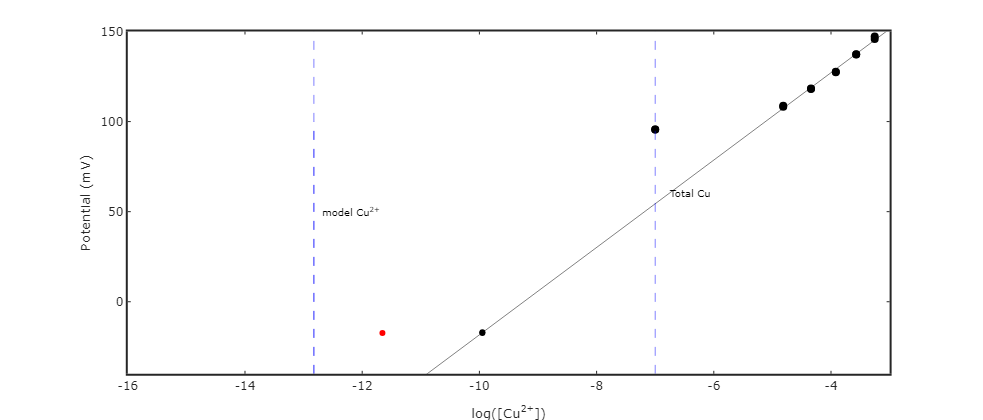

logCunosolid = -1.2825e+01


logCuoriginalsample = -9.9496e+00


logCuonept = -1.1655e+01


In [6]:
% MODEL FOR COMPARISON

%model with just inorganic speciation
%geochemical model
% input the constants and solution chemistry

flag1=2; %flag1 for concentration based search vector (1) or for log based search vector (2).
flag2=1; %flag2 for numerical derivatives (2) or analtyical derivatives (1)
database=[]; 
flag3=0; % flag3 1 for show warnings. 0 no warnings
flag4=0; %if=1 solve tableau one line at a time to get a good initial guess (no solids). really challenging probs only
flag5=0; %if=1 use stored initial guess for including solids

CuT=CuTmeas; inorganicTOTALS=[CuT];
inorganicTOTALS(inorganicTOTALS==0)=1e-16; % get rid of zero values, b/c div by zero error
TOTALS=[inorganicTOTALS]; %TOTALS=inorganicTOTALS;
pe=20.75-pH; PCO2=10^-3.5;
[Cuall,CuOH,CuOH2s,CuOs,CuCO3s,tenorite,malachite,MASSERR]=CuOHCO2opentableauallsolids(pH,pe,PCO2,TOTALS',flag1,flag2,flag3,flag4,flag5,database);
[CuwithCuOs,CuOH,CuOH2s,CuOs,CuCO3s,tenorite,malachite,MASSERR]=CuOHCO2opentableauCuOs(pH,pe,PCO2,TOTALS',flag1,flag2,flag3,flag4,flag5,database);
[Cunosolid,CuOH,CuOH2s,CuOs,CuCO3s,tenorite,malachite,MASSERR]=CuOHCO2opentableaunosolid(pH,pe,PCO2,TOTALS',flag1,flag2,flag3,flag4,flag5,database);

plot(log10(CuTplus),Emeas,'ko','markersize',8)

hold on
plot([logCuoriginal'],[mVAoriginal'],'ko')
logCuplot=-13:0.1:-3; Eplot=polyval(param,logCuplot);
plot(logCuplot,Eplot,'k-')
set(gca,'linewidth',2)
xlabel('log[Cu^{2+}]'); ylabel('E (mV)')
hold on

plot([log10(Cuall) log10(Cuall)],[-100 100],'b--')
plot([log10(Cunosolid) log10(Cunosolid)],[-100 150],'b--'); hold on
plot([log10(CuT) log10(CuT)],[-100 150],'b--')
%plot([-9.576 -9.576],[-100 100],'b--')

text(log10(Cunosolid)+0.1,50,'model Cu^{2+}','rotation',90)
text(log10(CuT)+0.2,60,'Total Cu','rotation',90)


xlabel('log([Cu^{2+}])')
ylabel('Potential (mV)')
set(gca,'LineWidth',2,'fontsize',12)

logCunosolid=log10(Cunosolid)
logCuoriginalsample=mean((mVAoriginal-param(2))/param(1))
logCuonept

axis([-16 -3 -40 150])

plot(logCuonept,Eorig,'ro','markerfacecolor','r')
